<a href="https://colab.research.google.com/github/JCCavalcante-Faria/Projetos-Data-Science/blob/main/%5BToronto%2C_Canada_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Toronto (Canada)*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Toronto (Canada), e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/canada/on/toronto/2023-03-09/visualisations/listings.csv")

## Análise dos Dados
A importância de variáveis é um conceito muito útil de ser explorado em um projeto de ciência de dados pois permite que se extraia mais valor do modelo, além do valor como ferramenta de previsão, logo abaixo está descrito ao que cada variável se refere para facilitar o entendimento.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
*  `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df . head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,701230,Authentic Bright Artist's Loft,3587917,Darby,NaN,High Park North,43.65873,-79.45336,Entire home/apt,100,28,15,2018-07-31,0.13,1,0,0,NaN
1,40456,Downtown- King Size Bed and Parking,174063,Denis,NaN,South Parkdale,43.63539,-79.44010,Entire home/apt,150,31,114,2022-01-29,0.74,4,313,0,NaN
2,1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.64590,-79.42423,Entire home/apt,469,28,7,2017-12-04,0.08,1,0,0,NaN
3,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64080,-79.37673,Private room,104,180,169,2013-08-27,1.02,2,365,0,NaN
4,26654,World Class downtown @CN Tower Theatre MTCC ga...,113345,Adela,NaN,Waterfront Communities-The Island,43.64608,-79.39032,Entire home/apt,145,28,41,2021-01-31,0.28,3,221,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**
Agora vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna. 
Podemos identificar 17.997 entradas de 18 variáveis que nesse caso se referem as colunas e também os tipos de cada uma sendo inteiro, float (numeros decimais) e objetos.

In [5]:
# identificar o volume de dados do DataFrame
print("Entrada:\t {} ". format(df.shape[0]))
print ("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
 
df. dtypes

Entrada:	 17997 
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna **neighbourhood_group** possui 100% dos seus valores faltantes.
* As variáveis **reviews_per_month** e **last_review** possuem valores nulos em quase 30% das linhas.
* As variáveis **name** e **host_name** têm menos de 0,1% dos valores nulos.

Um valor **ausente** ou **nulo** pode significar várias coisas diferentes. Talvez o campo não fosse aplicável, o evento não aconteceu ou os dados não estavam disponíveis. Pode ser que a pessoa que inseriu os dados não sabia o valor certo, ou não se preocupou que um campo não foi preenchido.

No entanto, há muitos cenários de análise de dados nos quais os valores ausentes fornecem informações importantes. O significado dos valores ausentes depende em grande parte do contexto. 

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df. isnull().sum()/ df.shape[0]).sort_values (ascending=False)

neighbourhood_group               1.000000
license                           0.560593
reviews_per_month                 0.277491
last_review                       0.277491
host_name                         0.000111
name                              0.000111
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
O que é um histograma?

Um histograma é uma espécie de gráfico de barras que demonstra uma distribuição de frequências. No histograma, a base de cada uma das barras representa uma classe e a altura representa a quantidade ou frequência absoluta com que o valor de cada classe ocorre.



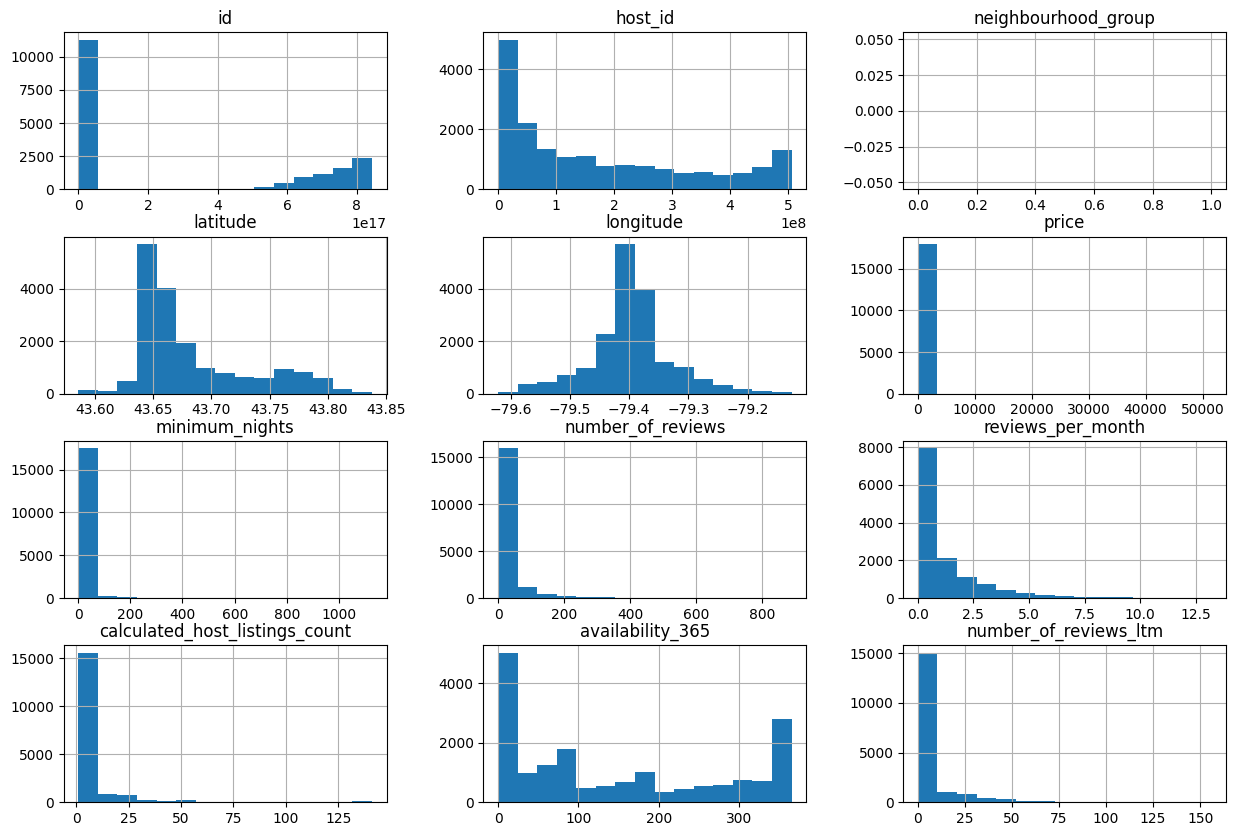

In [7]:
# plotar o histograma das variáveis numéricas
df.hist (bins=15, figsize=(15,10));

* HÁ OUTLIERS PRESENTES?

Em estatística, outlier, valor aberrante ou valor atípico, é uma observação que apresenta um grande afastamento das demais da série, ou que é inconsistente. A existência de outliers implica, tipicamente, em prejuízos à interpretação dos resultados dos testes estatísticos aplicados às amostras.

Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Olhe por exemplo as variáveis price, minimum_nights e calculated_host_listings_count.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de outliers. São elas:

* Resumo estatístico por meio do método describe()
* Plotar boxplots para a variável.

In [8]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,17997.000000,17997.000000,17997.00000,13003.000000,17997.000000,17997.000000
mean,179.530311,26.992777,23.99511,1.187287,6.142524,147.210480
std,515.989639,38.348540,52.74416,1.560878,15.296411,134.879188
min,0.000000,1.000000,0.00000,0.010000,1.000000,0.000000
25%,75.000000,28.000000,0.00000,0.180000,1.000000,6.000000
50%,118.000000,28.000000,4.00000,0.550000,1.000000,95.000000
75%,199.000000,28.000000,23.00000,1.600000,4.000000,282.000000
max,51561.000000,1125.000000,889.00000,13.200000,141.000000,365.000000


No resumo acima conseguimos obter várias informações, como:
* * A variável `price` possui 75% do valor abaixo de 199, porém seu valor máximo é 51561.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.
# Boxplot para minimum_nights

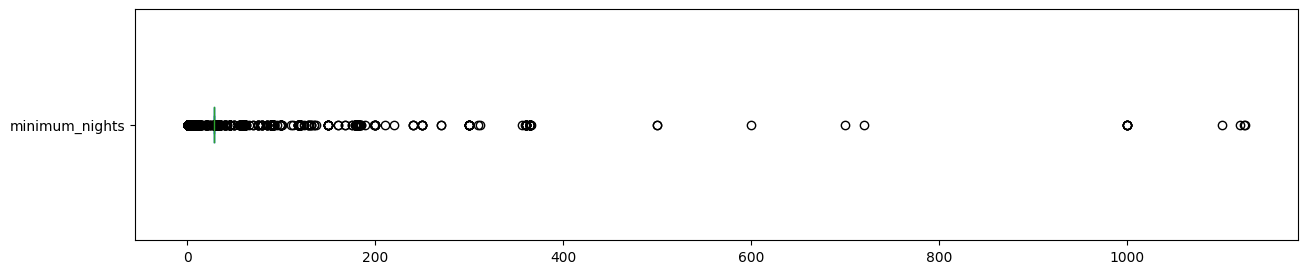

minimum_nights: valores acima de 30:
1196 entradas
6.6456%


In [9]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))



 # BOXPLOT PARA PRICE.
  
  Faremos agora um boxplot para price e verificar os outliers.

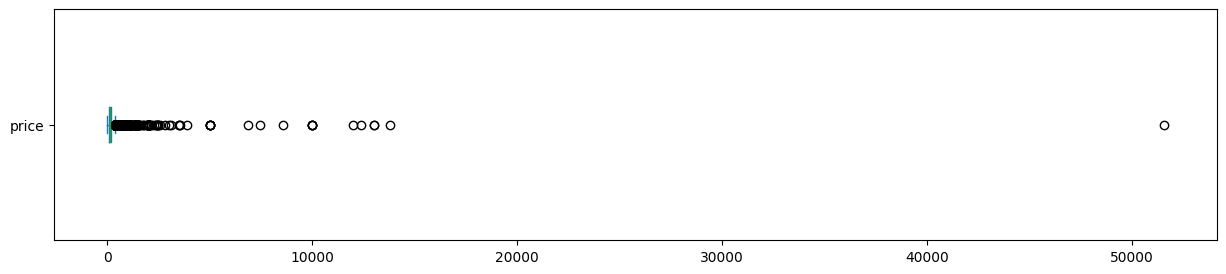


price: valores acima de 500
649 entradas
3.6062%


In [10]:
#  boxplot price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 500 para price
print("\nprice: valores acima de 500")
print("{} entradas".format(len(df[df.price > 500])))
print("{:.4f}%".format((len(df[df.price > 500]) / df.shape[0])*100))

 Identificamos outliers nas variáveis price e minimum_nights, vamos agora limpar o DataFrame delas e plotar novamente o histograma e ver o comportamento ou mudança nos dados.

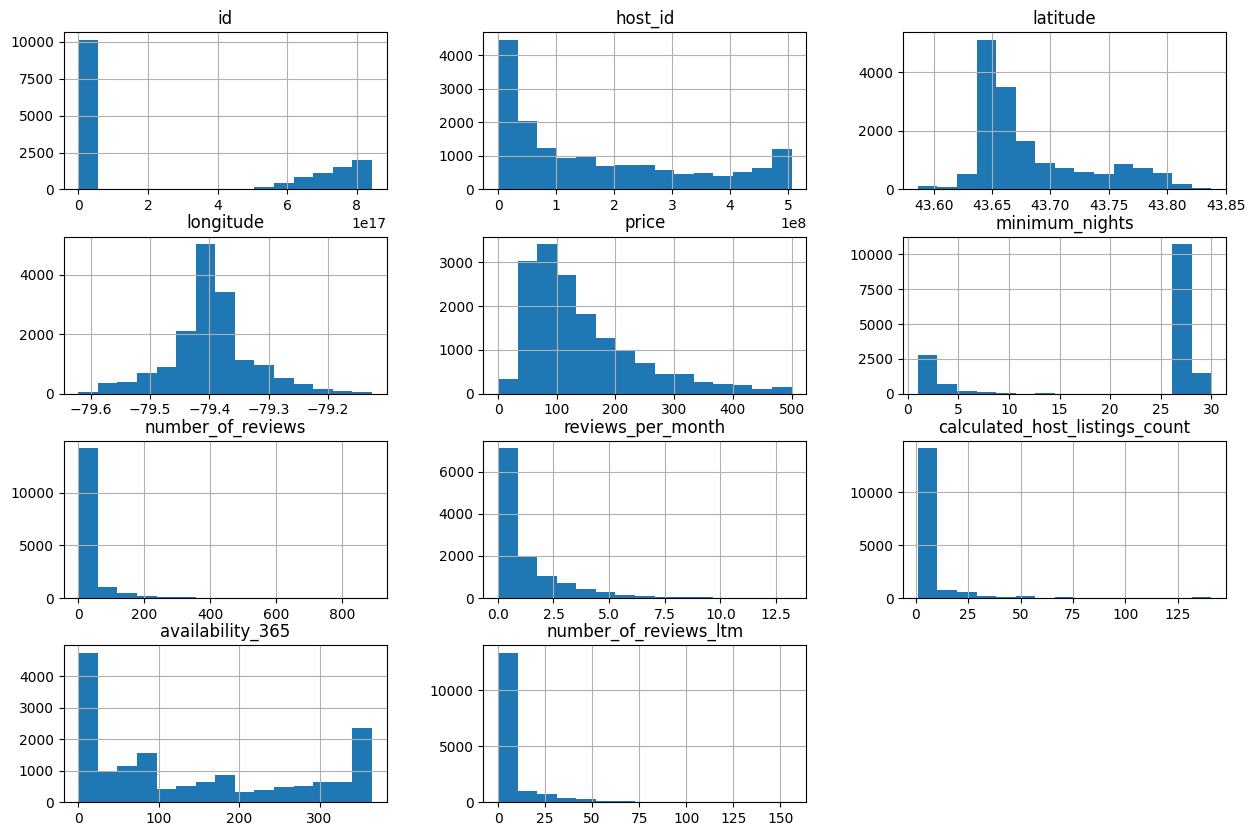

In [11]:
# remover os outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover neighbourhood_group, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``
df.price.mean()

179.53031060732343

A média dos preços fica em C$ 179,00

### **Q4. Qual a correlação existente entre as variáveis**
Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

*  Criar uma matriz de correlação
*  Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)





,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.179800,0.000040,0.127553,-0.021427,0.091027
minimum_nights,-0.179800,1.000000,-0.145146,-0.443894,0.114919,-0.050202
number_of_reviews,0.000040,-0.145146,1.000000,0.516410,-0.086511,-0.030532
reviews_per_month,0.127553,-0.443894,0.516410,1.000000,-0.097685,0.069191
calculated_host_listings_count,-0.021427,0.114919,-0.086511,-0.097685,1.000000,0.040282
availability_365,0.091027,-0.050202,-0.030532,0.069191,0.040282,1.000000


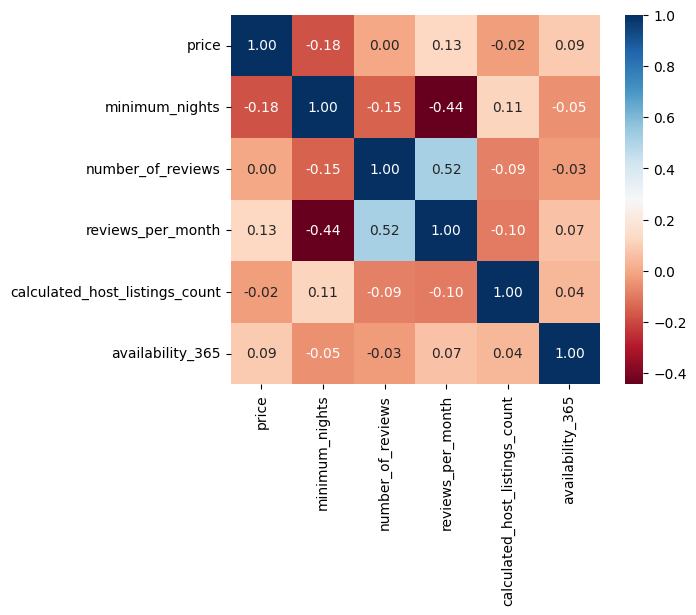

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna da variável room_type indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método value_counts().

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()


Entire home/apt    10633
Private room        5389
Shared room          150
Hotel room             3
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]


Entire home/apt    0.657372
Private room       0.333168
Shared room        0.009274
Hotel room         0.000185
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Toronto?**
Uma maneira de se verificar uma variável em função da outra é usando groupby(). No caso, queremos comparar os bairros (neighbourhoods) a partir do preço de locação.



In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
Bridle Path-Sunnybrook-York Mills    205.666667
Waterfront Communities-The Island    203.589658
Forest Hill South                    190.076923
Bay Street Corridor                  186.697674
Lawrence Park South                  181.575000
Lambton Baby Point                   178.241379
Niagara                              177.639241
Mount Pleasant East                  169.015152
South Riverdale                      166.410714
Beechborough-Greenbrook              165.647059
Name: price, dtype: float64

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se x=longitude e y=latitude.

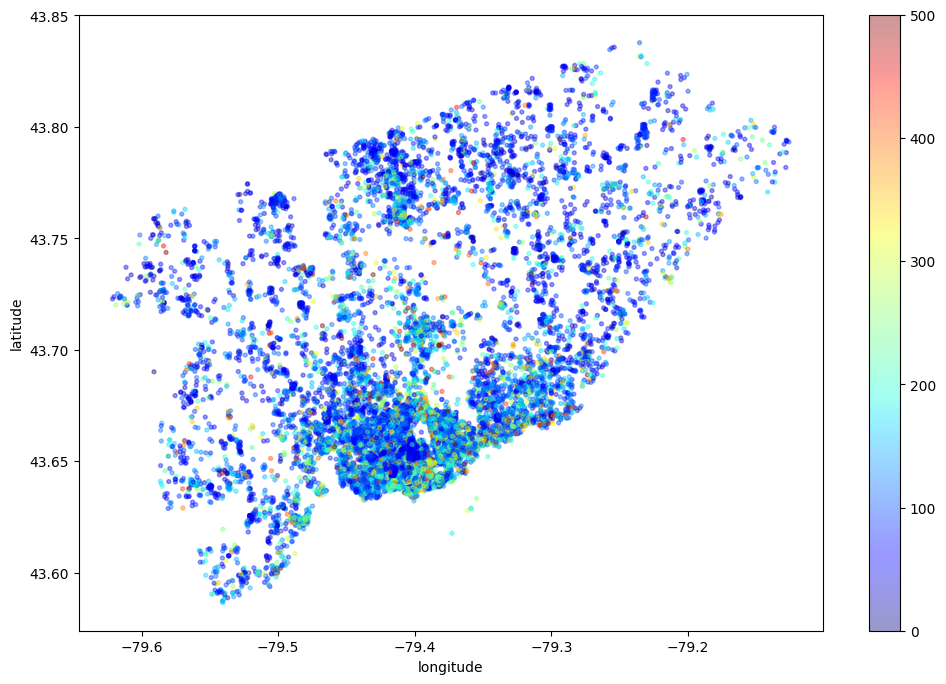

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean .minimum_nights.mean()

21.962163833075735

## Conclusões
Ao longo desse estudo pudemos verificar como grandes quantidades de dados podem ser usados para extrair informações que a primeira vista não são visíveis. Primeiramente abordamos a importância das variáveis e sua classificação dentro do modelo e o valor como ferramenta de previsão.
 Foram identificados os conjuntos e os tipos de dados inseridos, os valores ausentes ou nulos e sua relevância para a análise de uma amostra, o que foi demonstrado através de histogramas, em seguida identificamos os outliers através da distribuição.

 Quais informações relevantes foram levantadas?
 * O valor médio dos aluguéis
 * O valor máximo dos aluguéis
 * O menor valor dos aluguéis
 * A região mais cara e a mais barata.
 * Quantidade de noites em média de locação
 * Tipo de imóvel mais alugado
 * A porcentagem de cada tipo de imóvel
 
 Dessa forma, foi possível extrair informações importantes para análise do negócio e comportamento dos consumidores.
